<a href="https://colab.research.google.com/github/baharababah/Data-Cleaning-Using-Pandas/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Indented block


#**Data Cleaning Using Pandas**




## Import required packages

In [93]:
# import required packages
from google.colab import drive 
drive.mount('/content/drive/')
import pandas as pd
import numpy as np

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Reading the dataset from the google drive

In [94]:
# Read the Iris data
df = pd.read_csv('/content/drive/My Drive/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [95]:
# Try to modify some values to NAN values in order to explain some cleaning steps.
for row in df.index:
  if df['SepalLengthCm'][row] == 4.9:
    df['SepalLengthCm'][row] = np.nan

  if df['SepalWidthCm'][row] == 3.0:
    df['SepalWidthCm'][row] = np.nan

  if df['PetalLengthCm'][row] == 1.4:
    df.loc[150] = [1, 	5.1, 	3.5, 	1.4, 	0.2, 	'Iris-setosa']  # adding a row
    df.loc[151] = [1, 	5.1, 	3.5, 	1.4, 	0.2, 	'Iris-setosa']  # adding a row
    df.loc[152] = [1, 	5.1, 	3.5, 	1.4, 	0.2, 	'Iris-setosa']  # adding a row
    df.loc[153] = [1, 	5.1, 	3.5, 	1.4, 	5.9, 	'Iris-setosa']  # adding a row
    df.loc[154] = [1, 	5.1, 	3.5, 	1.4, 	6.4, 	'Iris-setosa']  # adding a row
    df.loc[155] = [1, 	5.1, 	3.5, 	1.4, 	0.001, 	'Iris-setosa']  # adding a row
    
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.200,Iris-setosa
1,2,NaN,NaN,1.4,0.200,Iris-setosa
2,3,4.7,3.2,1.3,0.200,Iris-setosa
3,4,4.6,3.1,1.5,0.200,Iris-setosa
4,5,5.0,3.6,1.4,0.200,Iris-setosa
...,...,...,...,...,...,...
151,1,5.1,3.5,1.4,0.200,Iris-setosa
152,1,5.1,3.5,1.4,0.200,Iris-setosa
153,1,5.1,3.5,1.4,5.900,Iris-setosa
154,1,5.1,3.5,1.4,6.400,Iris-setosa


# Data Cleaning Steps:

## 1. Standardisation

### 1.1 Rename the columns

In [96]:
# One of the Standardisation is to change the columns names if needed.
df.columns = ['Id', 'Sepal_Length_cm', 'Sepal_Width_cm', 'Petal_Length_cm', 'Petal_Width_cm', 'Species']
df.head()

,Id,Sepal_Length_cm,Sepal_Width_cm,Petal_Length_cm,Petal_Width_cm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,NaN,NaN,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 1.2 Chaneg the measurment of the columns (Sepal_Length, Sepal_Width, 	Petal_Length, Petal_Width) from cm to inches



In [97]:
# we change the name of related columns from cm to inches using repalce method for pandas dataframe
df.columns = df.columns.str.replace('cm', 'inches')
df.head()

,Id,Sepal_Length_inches,Sepal_Width_inches,Petal_Length_inches,Petal_Width_inches,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,NaN,NaN,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [98]:
# to convert the value from cm to inches, you should multiply it by 0.3937
df['Sepal_Length_inches'] = df['Sepal_Length_inches'] *  0.3937
df['Sepal_Width_inches'] = df['Sepal_Width_inches'] *  0.3937
df['Petal_Length_inches'] = df['Petal_Length_inches'] *  0.3937
df['Petal_Width_inches'] = df['Petal_Width_inches'] *  0.3937
df.head()

,Id,Sepal_Length_inches,Sepal_Width_inches,Petal_Length_inches,Petal_Width_inches,Species
0,1,2.00787,1.37795,0.55118,0.07874,Iris-setosa
1,2,NaN,NaN,0.55118,0.07874,Iris-setosa
2,3,1.85039,1.25984,0.51181,0.07874,Iris-setosa
3,4,1.81102,1.22047,0.59055,0.07874,Iris-setosa
4,5,1.96850,1.41732,0.55118,0.07874,Iris-setosa


### 1.3 Performing rounding of all float columns 



In [99]:
df['Sepal_Length_inches'] = df['Sepal_Length_inches'].round(2)
df['Sepal_Width_inches'] = df['Sepal_Width_inches'].round(2)
df['Petal_Length_inches'] = df['Petal_Length_inches'].round(2)
df['Petal_Width_inches'] = df['Petal_Width_inches'].round(2)
df.head()

,Id,Sepal_Length_inches,Sepal_Width_inches,Petal_Length_inches,Petal_Width_inches,Species
0,1,2.01,1.38,0.55,0.08,Iris-setosa
1,2,NaN,NaN,0.55,0.08,Iris-setosa
2,3,1.85,1.26,0.51,0.08,Iris-setosa
3,4,1.81,1.22,0.59,0.08,Iris-setosa
4,5,1.97,1.42,0.55,0.08,Iris-setosa


### 1.4 Determining the datatypes

In [100]:
df.dtypes

Id                       int64
Sepal_Length_inches    float64
Sepal_Width_inches     float64
Petal_Length_inches    float64
Petal_Width_inches     float64
Species                 object
dtype: object

## 2. Syntax Errors

In [101]:
df.head()

,Id,Sepal_Length_inches,Sepal_Width_inches,Petal_Length_inches,Petal_Width_inches,Species
0,1,2.01,1.38,0.55,0.08,Iris-setosa
1,2,NaN,NaN,0.55,0.08,Iris-setosa
2,3,1.85,1.26,0.51,0.08,Iris-setosa
3,4,1.81,1.22,0.59,0.08,Iris-setosa
4,5,1.97,1.42,0.55,0.08,Iris-setosa


In [102]:
list(df['Species'].unique())

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [103]:
# Remove 'Iris-' from the begining of each input in  'Species' column.
df['Species'] = df['Species'].str.replace('Iris-', '')
df.head()

,Id,Sepal_Length_inches,Sepal_Width_inches,Petal_Length_inches,Petal_Width_inches,Species
0,1,2.01,1.38,0.55,0.08,setosa
1,2,NaN,NaN,0.55,0.08,setosa
2,3,1.85,1.26,0.51,0.08,setosa
3,4,1.81,1.22,0.59,0.08,setosa
4,5,1.97,1.42,0.55,0.08,setosa


In [104]:
list(df['Species'].unique())

['setosa', 'versicolor', 'virginica']

##3. Duplicates

In [105]:
#check the duplicated rows
df[df.duplicated()]

,Id,Sepal_Length_inches,Sepal_Width_inches,Petal_Length_inches,Petal_Width_inches,Species
150,1,2.01,1.38,0.55,0.08,setosa
151,1,2.01,1.38,0.55,0.08,setosa
152,1,2.01,1.38,0.55,0.08,setosa


In [106]:
# the number of duplicates rows
sum(df.duplicated())  

3

In [107]:
# drop duplicates if needed
df = df.drop_duplicates()

In [108]:
sum(df.duplicated())

0

## 4. Missing Data

In [109]:
# We can check if there is any missing values in the entire dataframe as shown
df.isnull()

,Id,Sepal_Length_inches,Sepal_Width_inches,Petal_Length_inches,Petal_Width_inches,Species
0,False,False,False,False,False,False
1,False,True,True,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
148,False,False,False,False,False,False
149,False,False,True,False,False,False
153,False,False,False,False,False,False
154,False,False,False,False,False,False


In [110]:
# check for missing values in each column
df.isnull().any()

Id                     False
Sepal_Length_inches     True
Sepal_Width_inches      True
Petal_Length_inches    False
Petal_Width_inches     False
Species                False
dtype: bool

In [111]:
# check how many missing values there are across each variable/column by
df.isnull().sum()

Id                      0
Sepal_Length_inches     6
Sepal_Width_inches     26
Petal_Length_inches     0
Petal_Width_inches      0
Species                 0
dtype: int64

In [112]:
# check to see if we have any missing values
df.isnull().values.any()

True

In [113]:
# total number of missing values 
df.isnull().sum().sum()

32

In [114]:
# one solution of dealing with missing values is to drop it, the command below will drop rows that has nan for all cells.
df = df.dropna(how='all')
df

,Id,Sepal_Length_inches,Sepal_Width_inches,Petal_Length_inches,Petal_Width_inches,Species
0,1,2.01,1.38,0.55,0.08,setosa
1,2,NaN,NaN,0.55,0.08,setosa
2,3,1.85,1.26,0.51,0.08,setosa
3,4,1.81,1.22,0.59,0.08,setosa
4,5,1.97,1.42,0.55,0.08,setosa
...,...,...,...,...,...,...
148,149,2.44,1.34,2.13,0.91,virginica
149,150,2.32,NaN,2.01,0.71,virginica
153,1,2.01,1.38,0.55,2.32,setosa
154,1,2.01,1.38,0.55,2.52,setosa


In [115]:
# the command below will drop columns that have nan for all inputs. 
df = df.dropna(axis=1, how='all')
df.head()

,Id,Sepal_Length_inches,Sepal_Width_inches,Petal_Length_inches,Petal_Width_inches,Species
0,1,2.01,1.38,0.55,0.08,setosa
1,2,NaN,NaN,0.55,0.08,setosa
2,3,1.85,1.26,0.51,0.08,setosa
3,4,1.81,1.22,0.59,0.08,setosa
4,5,1.97,1.42,0.55,0.08,setosa


In [116]:
# We can drop rows that contain less than 6 observations
df = df.dropna(axis=0, how='any', thresh=6, inplace=False)
df

,Id,Sepal_Length_inches,Sepal_Width_inches,Petal_Length_inches,Petal_Width_inches,Species
0,1,2.01,1.38,0.55,0.08,setosa
2,3,1.85,1.26,0.51,0.08,setosa
3,4,1.81,1.22,0.59,0.08,setosa
4,5,1.97,1.42,0.55,0.08,setosa
5,6,2.13,1.54,0.67,0.16,setosa
...,...,...,...,...,...,...
146,147,2.48,0.98,1.97,0.75,virginica
148,149,2.44,1.34,2.13,0.91,virginica
153,1,2.01,1.38,0.55,2.32,setosa
154,1,2.01,1.38,0.55,2.52,setosa


In [117]:
#check the number of duplicated rows after remove the duplication
df.isnull().sum()

Id                     0
Sepal_Length_inches    0
Sepal_Width_inches     0
Petal_Length_inches    0
Petal_Width_inches     0
Species                0
dtype: int64

In [118]:
# we allso can fill the cells with null values, in this dataframe we do not have. 
df = df.fillna(0)

In [119]:
df.shape

(122, 6)

## 5. Outliers

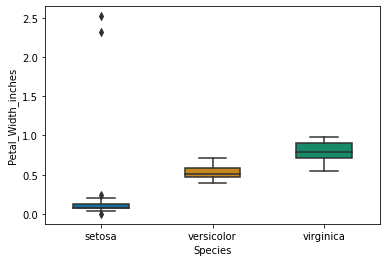

In [120]:
import seaborn as sns
# check the outliers of 'Sepal_Width_inches' for each species, there are outliers for 'setosa'.
# how to remove the outliers???
bplot = sns.boxplot(y='Petal_Width_inches', x='Species', data = df, width=0.5, palette="colorblind")

In [121]:
df.shape

(122, 6)

In [122]:
# Dealing with Outliers using the Interquantile range
Q1 = df['Petal_Width_inches'].quantile(0.25)
Q3 = df['Petal_Width_inches'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.59

In [123]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(-0.765, 1.595)

In [124]:
# show the outliers
outliers_df_iqr = df[((df['Petal_Width_inches'] < lower_limit) |(df['Petal_Width_inches'] > upper_limit))]
outliers_df_iqr

,Id,Sepal_Length_inches,Sepal_Width_inches,Petal_Length_inches,Petal_Width_inches,Species
153,1,2.01,1.38,0.55,2.32,setosa
154,1,2.01,1.38,0.55,2.52,setosa


In [125]:
Without_outliers_df = outliers_df_iqr = df[((df['Petal_Width_inches'] > lower_limit) & (df['Petal_Width_inches'] < upper_limit))]
Without_outliers_df.head()

,Id,Sepal_Length_inches,Sepal_Width_inches,Petal_Length_inches,Petal_Width_inches,Species
0,1,2.01,1.38,0.55,0.08,setosa
2,3,1.85,1.26,0.51,0.08,setosa
3,4,1.81,1.22,0.59,0.08,setosa
4,5,1.97,1.42,0.55,0.08,setosa
5,6,2.13,1.54,0.67,0.16,setosa


In [126]:
df['Petal_Width_inches'].describe()

count    122.000000
mean       0.492787
std        0.388777
min        0.000000
25%        0.120000
50%        0.510000
75%        0.710000
max        2.520000
Name: Petal_Width_inches, dtype: float64

In [127]:
Without_outliers_df['Petal_Width_inches'].describe()

count    120.000000
mean       0.460667
std        0.300094
min        0.000000
25%        0.120000
50%        0.510000
75%        0.710000
max        0.980000
Name: Petal_Width_inches, dtype: float64

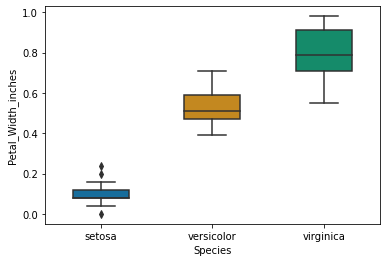

In [128]:
bplot = sns.boxplot(y='Petal_Width_inches', x='Species', data = Without_outliers_df, width=0.5, palette="colorblind")